In [335]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

sns.set()

In [336]:
df = pd.read_csv('2013_movies.csv')

In [337]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans_master = nans(df)
nans_master.iloc[:,0:40].head(5)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00
25,Cloudy with a Chance of Meatballs 2,78000000.0,119793567,NaN,PG,95,2013-09-27 00:00:00
66,Tyler Perry's A Madea Christmas,NaN,52543354,Tyler Perry,PG-13,105,2013-12-13 00:00:00
67,Tyler Perry's Temptation: Confessions of a Mar...,NaN,51975354,Tyler Perry,PG-13,111,2013-03-29 00:00:00


In [338]:
df = df.dropna(axis=0)

In [339]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


(array([37., 21., 14.,  3.,  3.,  3.,  2.,  0.,  1.,  3.]),
 array([2.55682510e+07, 6.54782306e+07, 1.05388210e+08, 1.45298190e+08,
        1.85208169e+08, 2.25118149e+08, 2.65028129e+08, 3.04938108e+08,
        3.44848088e+08, 3.84758067e+08, 4.24668047e+08]),
 <a list of 10 Patch objects>)

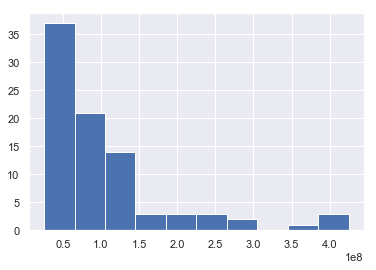

In [340]:
plt.hist(df['DomesticTotalGross'])

In [341]:
df.corr()

,Budget,DomesticTotalGross,Runtime
Budget,1.000000,0.531319,0.368510
DomesticTotalGross,0.531319,1.000000,0.265719
Runtime,0.368510,0.265719,1.000000


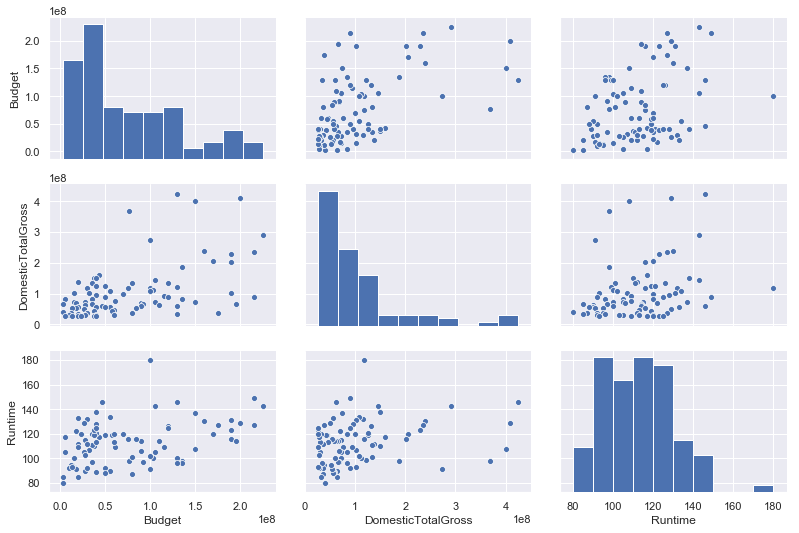

In [342]:
sns.pairplot(df, height = 2.5, aspect=1.5);

## Challenge 1
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [343]:
df['ones'] = 1.0

In [344]:
features = pd.DataFrame(df['ones'])
target = pd.DataFrame(df['DomesticTotalGross'])

scaler = StandardScaler()
features = scaler.fit_transform(features)

In [345]:
lr = LinearRegression()

lr.fit(features, target)
lr.score(features, target)

0.0

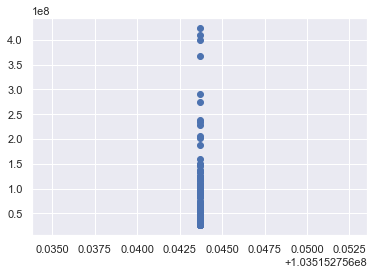

In [346]:
plt.scatter(lr.predict(features), target)

In [347]:
residuals = lr.predict(features) - target

(array([ 3.,  1.,  0.,  2.,  3.,  3.,  3., 14., 21., 37.]),
 array([-3.21152771e+08, -2.81242792e+08, -2.41332812e+08, -2.01422833e+08,
        -1.61512853e+08, -1.21602873e+08, -8.16928938e+07, -4.17829142e+07,
        -1.87293456e+06,  3.80370450e+07,  7.79470246e+07]),
 <a list of 10 Patch objects>)

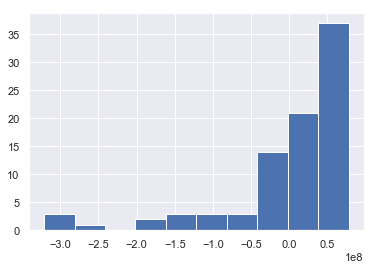

In [348]:
plt.hist(residuals['DomesticTotalGross'])

The residuals are not normally distributed; unsurprising considering that the feature was a constant - it merely represents the distribution of box office returns.

## Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [349]:
features = pd.DataFrame(df[['Budget','ones']])
target = pd.DataFrame(df['DomesticTotalGross'])

scaler = StandardScaler()
features = scaler.fit_transform(features)

In [350]:
lr = LinearRegression()

lr.fit(features, target)
lr.score(features, target)

0.2823003769295487

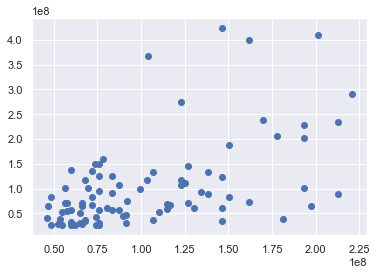

In [351]:
plt.scatter(lr.predict(features), target)

In [352]:
residuals = lr.predict(features) - target

(array([ 3.,  1.,  0.,  1.,  6., 11., 26., 28.,  7.,  4.]),
 array([-2.78440271e+08, -2.36285967e+08, -1.94131662e+08, -1.51977357e+08,
        -1.09823052e+08, -6.76687478e+07, -2.55144431e+07,  1.66398616e+07,
         5.87941663e+07,  1.00948471e+08,  1.43102776e+08]),
 <a list of 10 Patch objects>)

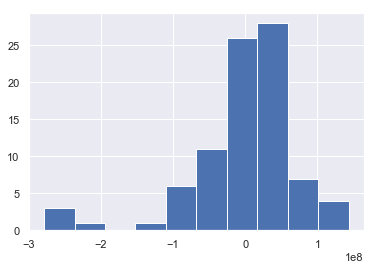

In [353]:
plt.hist(residuals['DomesticTotalGross'])

The model has improved - a vaguely linear pattern can be seen in the scatter plot. However, the histogram is not normally distributed.

## Challenge 3
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?`

In [354]:
df_dummies = pd.get_dummies(df['Rating'], prefix='rating')
df = pd.concat([df, df_dummies], axis=1)

In [355]:
df.Rating.value_counts()

PG-13    40
R        33
PG       14
Name: Rating, dtype: int64

In [356]:
features = pd.DataFrame(df[['Budget','ones', \
                            'rating_PG', 'rating_PG-13', 'rating_R']])
target = pd.DataFrame(df['DomesticTotalGross'])

scaler = StandardScaler()
features = scaler.fit_transform(features)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [357]:
lr = LinearRegression()

lr.fit(features, target)
lr.score(features, target)

0.2869010840454118

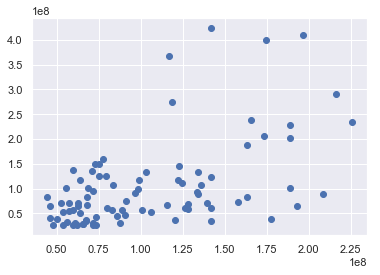

In [358]:
plt.scatter(lr.predict(features), target)

In [359]:
residuals = lr.predict(features) - target

(array([ 2.,  2.,  0.,  1.,  6., 10., 24., 28., 10.,  4.]),
 array([-2.82567295e+08, -2.40424052e+08, -1.98280808e+08, -1.56137565e+08,
        -1.13994321e+08, -7.18510777e+07, -2.97078343e+07,  1.24354092e+07,
         5.45786526e+07,  9.67218961e+07,  1.38865140e+08]),
 <a list of 10 Patch objects>)

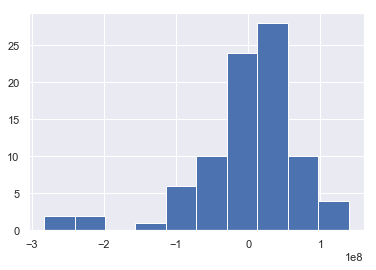

In [360]:
plt.hist(residuals['DomesticTotalGross'])

No improvement. The scatter and dist are changed slightly but do not tell us any more information.

## Challenge 4
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [361]:
df['Month'] = pd.to_datetime(df['ReleaseDate']).dt.month

In [362]:
features = pd.DataFrame(df[['Budget','Runtime', 'Month', \
                            'rating_PG', 'rating_PG-13', 'rating_R']])
target = pd.DataFrame(df['DomesticTotalGross'])

scaler = StandardScaler()
features = scaler.fit_transform(features)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [363]:
lr = LinearRegression()

lr.fit(features, target)
lr.score(features, target)

0.29948035780057125

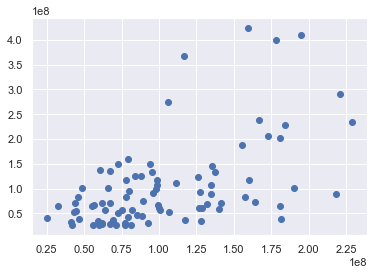

In [364]:
plt.scatter(lr.predict(features), target)

In [365]:
residuals = lr.predict(features) - target

(array([ 2.,  2.,  1.,  0.,  6., 14., 24., 24., 11.,  3.]),
 array([-2.65382470e+08, -2.24559884e+08, -1.83737297e+08, -1.42914710e+08,
        -1.02092124e+08, -6.12695368e+07, -2.04469501e+07,  2.03756366e+07,
         6.11982234e+07,  1.02020810e+08,  1.42843397e+08]),
 <a list of 10 Patch objects>)

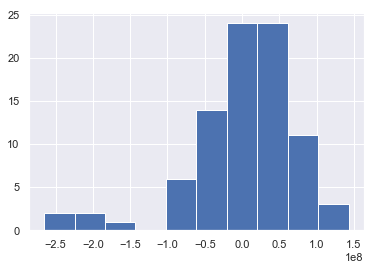

In [366]:
plt.hist(residuals['DomesticTotalGross'])

Adding Runtime and Month improves the model marginally, but not significantly. Perhaps adding polynomial features will help.

In [367]:
poly2 = PolynomialFeatures(degree=2) 

lr.fit(poly2.fit_transform(features),target)
lr.score(poly2.transform(features),target)

0.3263098947880888

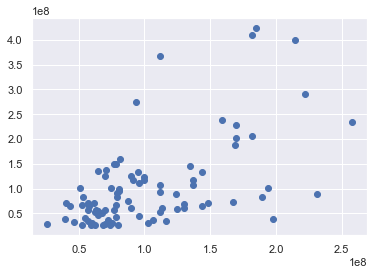

In [368]:
plt.scatter(lr.predict(poly2.fit_transform(features)), target)

In [369]:
residuals = lr.predict(poly2.fit_transform(features)) - target

(array([ 3.,  2.,  0.,  0., 10., 20., 27., 17.,  6.,  2.]),
 array([-2.56060241e+08, -2.14544468e+08, -1.73028694e+08, -1.31512921e+08,
        -8.99971474e+07, -4.84813740e+07, -6.96560060e+06,  3.45501728e+07,
         7.60659462e+07,  1.17581720e+08,  1.59097493e+08]),
 <a list of 10 Patch objects>)

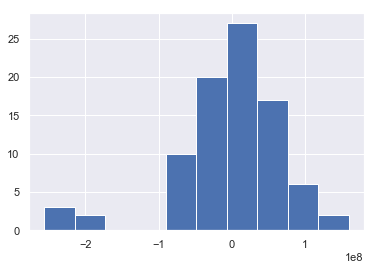

In [370]:
plt.hist(residuals['DomesticTotalGross'])

In [371]:
poly3 = PolynomialFeatures(degree=3) 

lr.fit(poly3.fit_transform(features),target)
lr.score(poly3.transform(features),target)

-40.72310837215717

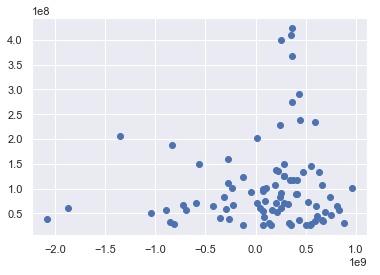

In [372]:
plt.scatter(lr.predict(poly3.fit_transform(features)), target)

In [373]:
residuals = lr.predict(poly3.fit_transform(features)) - target

(array([ 2.,  1.,  0.,  3.,  6.,  7., 10., 31., 17., 10.]),
 array([-2.11664011e+09, -1.81912684e+09, -1.52161357e+09, -1.22410030e+09,
        -9.26587025e+08, -6.29073755e+08, -3.31560485e+08, -3.40472142e+07,
         2.63466056e+08,  5.60979327e+08,  8.58492597e+08]),
 <a list of 10 Patch objects>)

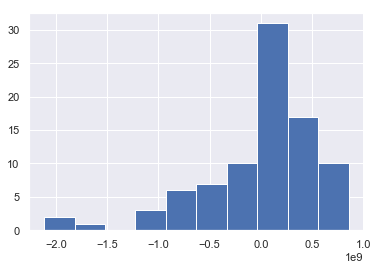

In [374]:
plt.hist(residuals['DomesticTotalGross'])

Adding a 2nd degree polynomial improves the R^2 score to 0.326, but adding a 3rd degree polynomial worsens the model significantly.

## Challenge 5
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [414]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.25, random_state=34)

#### Let's try the polynomial first.

In [434]:
lr.fit(poly2.fit_transform(X_train),y_train)
lr.score(poly2.transform(X_train),y_train)

0.37186942913987203

In [435]:
lr.score(poly2.transform(X_test),y_test)

-1.6190100296684289

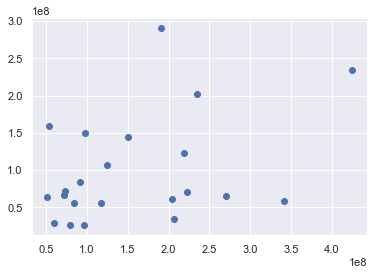

In [436]:
plt.scatter(lr.predict(poly2.transform(X_test)), y_test)

In [437]:
residuals = lr.predict(poly2.fit_transform(X_test)) - y_test

(array([2., 1., 5., 4., 3., 1., 2., 2., 1., 1.]),
 array([-1.06498028e+08, -6.75407602e+07, -2.85834924e+07,  1.03737754e+07,
         4.93310432e+07,  8.82883110e+07,  1.27245579e+08,  1.66202847e+08,
         2.05160114e+08,  2.44117382e+08,  2.83074650e+08]),
 <a list of 10 Patch objects>)

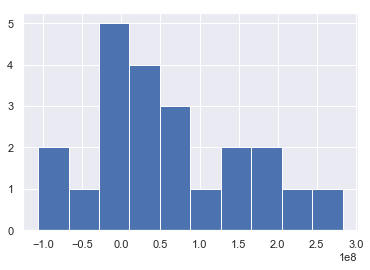

In [438]:
plt.hist(residuals['DomesticTotalGross'])

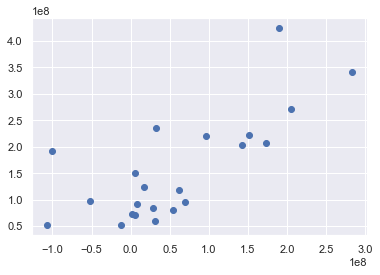

In [439]:
plt.scatter(residuals, lr.predict(poly2.transform(X_test)))

#### Hmm. Negative R^2 on the test set. Let's go back to the non-polynomial regression:

In [440]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.25, random_state=34)

In [441]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.2895220498110498

In [442]:
lr.score(X_test,y_test)

0.24018397639433753

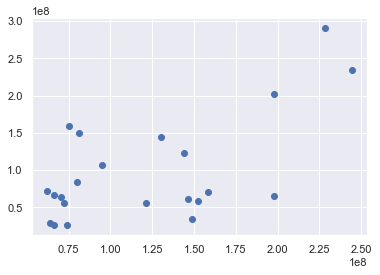

In [443]:
plt.scatter(lr.predict(X_test), y_test)

In [444]:
residuals = lr.predict(X_test) - y_test

(array([3., 0., 0., 6., 4., 2., 2., 2., 1., 2.]),
 array([-8.45201695e+07, -6.27935843e+07, -4.10669990e+07, -1.93404137e+07,
         2.38617155e+06,  2.41127568e+07,  4.58393421e+07,  6.75659274e+07,
         8.92925126e+07,  1.11019098e+08,  1.32745683e+08]),
 <a list of 10 Patch objects>)

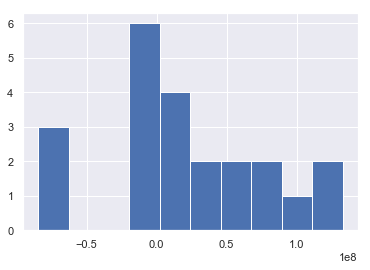

In [445]:
plt.hist(residuals['DomesticTotalGross'])

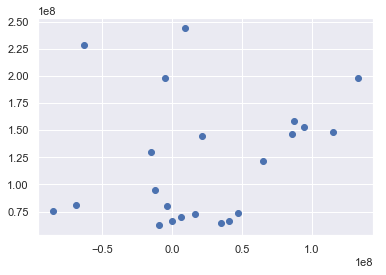

In [432]:
plt.scatter(residuals, lr.predict(X_test))